# Predicting Heart Disease Using Machine Learning Model

## 1.Problem
> Given Clinical parameters about a patient , can we predict whether or not they have heart disease?
## 2.Data
>This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them.
This data is available on kaggle :- https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
## 3.Evaluation
> If we can reach 95% accuracy at predicting, we will pursue the project
## 4.Features
| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

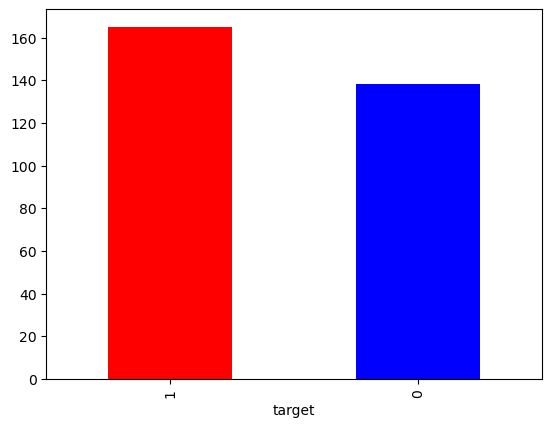

In [3]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"]);

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

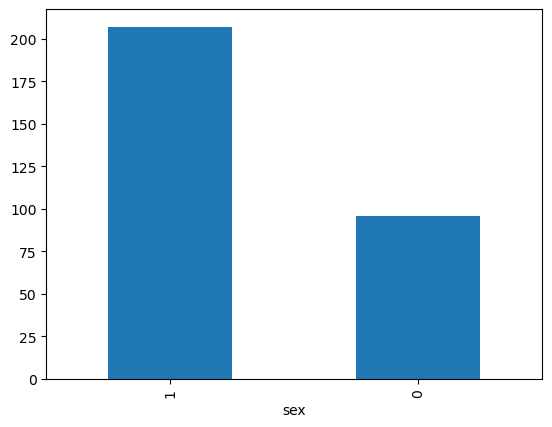

In [6]:
df.sex.value_counts().plot(kind="bar");

In [7]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


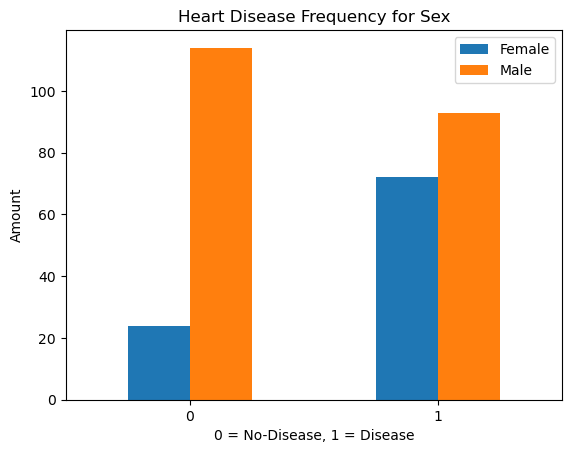

In [8]:
pd.crosstab(df.target,df.sex).plot(kind="bar");
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No-Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

## Age vs Max Heart Rate for Heart Disease

Text(0.5, 1.0, 'Heart Disease in function of Age and Max Heart Rate')

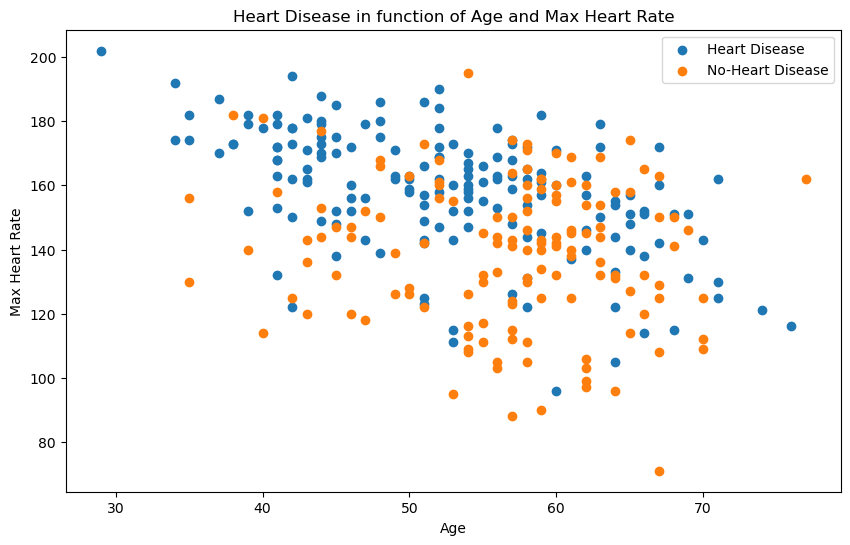

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1]);
plt.xlabel("Age")
plt.ylabel("Max Heart Rate");
plt.scatter(df.age[df.target==0],df.thalach[df.target==0]);
plt.legend(["Heart Disease","No-Heart Disease"]);
plt.title("Heart Disease in function of Age and Max Heart Rate")

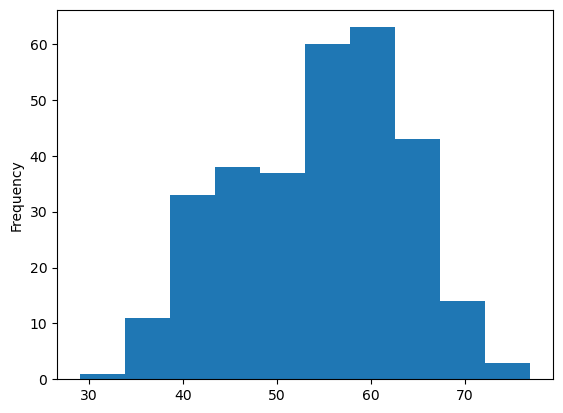

In [10]:
df.age.plot.hist();

## Heart Disease Frequency per chest pain type
* 0: Typical angina (chest pain);
* 1: Atypical angina (chest pain not related to heart); 
* 2: Non-anginal pain (typically esophageal spasms (non heart related)
* 3: Asymptomatic (chest pain not showing signs of disease) 

In [11]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


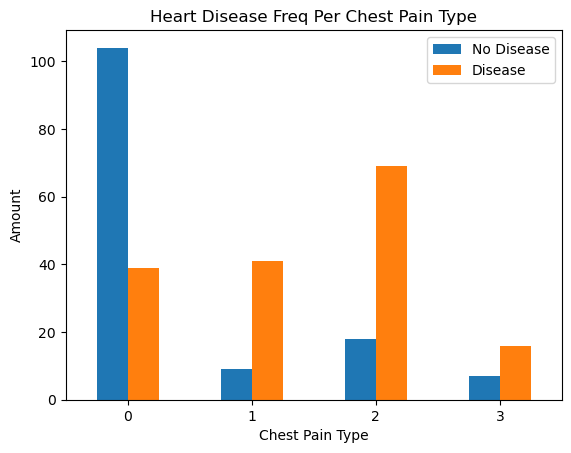

In [12]:
pd.crosstab(df.cp,df.target).plot(kind="bar")
plt.title("Heart Disease Freq Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

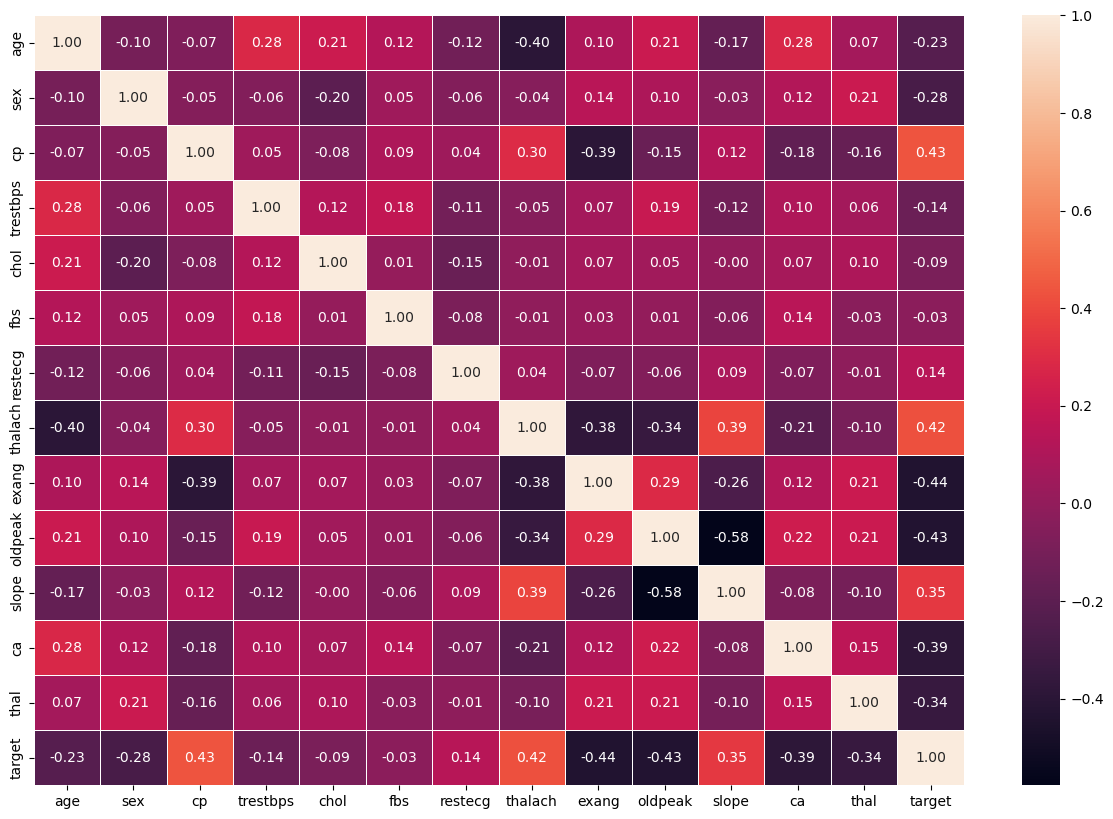

In [13]:
corrmatrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corrmatrix,annot= True,linewidths = 0.5,fmt = "0.2f");

## Modelling

In [14]:
x = df.drop("target",axis=1)
y = df["target"]

In [15]:
np.random.seed(42)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

we are going to try 3 models 
1. Logistic regression 
2. Randomforestclassifier
3. KNeighbours classifier

In [16]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}
def fit (models,xtrain,xtest,ytrain,ytest):
    np.random.seed(42)
    scores = {}
    for name,model in models.items():
        model.fit(xtrain,ytrain)
        scores[name] = model.score(xtest,ytest)

    return scores


In [17]:
scores = fit (models,xtrain,xtest,ytrain,ytest)
scores

C:\Users\soham\OneDrive\Desktop\Machine Learning\Heart Disease Project 1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

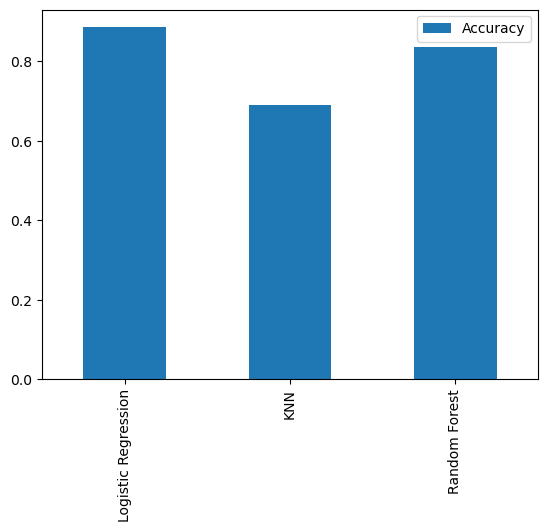

In [21]:
compare = pd.DataFrame(scores ,index=["Accuracy"])
compare.T.plot.bar();

## Hyper Parameter Tuning( By Hand )

### KNN 

In [22]:
train_scores=[]
test_scores=[]
neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(xtrain,ytrain)
    train_scores.append(knn.score(xtrain,ytrain))
    test_scores.append(knn.score(xtest,ytest))
    

In [23]:
train_scores,test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

In [24]:
test_scores


[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max Test Score:75.41%


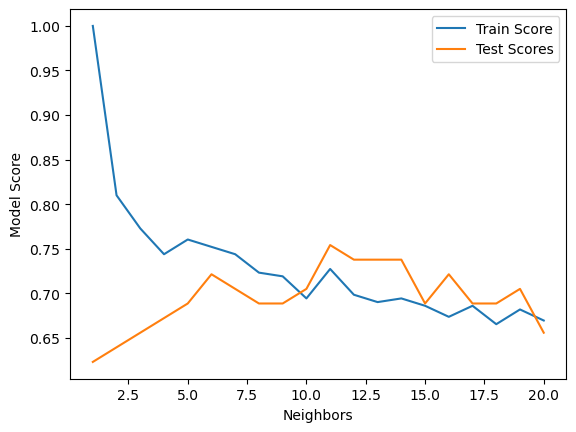

In [28]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xlabel("Neighbors")
plt.ylabel("Model Score")
plt.legend();
print(f"Max Test Score:{max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with Randomized search CV

In [36]:
log_grid = {"C": np.logspace(-4,4,20),
            "solver": ["liblinear"]}
rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}      

In [37]:
np.random.seed(42)
rs_log = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=log_grid,
                            cv=5,
                            n_iter=20,
                            verbose = True)

rs_log.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log.score(xtest,ytest)

0.8852459016393442

In [42]:
np.random.seed(12)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose = True)

rs_rf.fit(xtrain,ytrain)
rs_rf.score(xtest,ytest)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

## Hyperparameter Tuning Using GridSearchCV


In [41]:
log_grid = {"C": np.logspace(-4,4,50),
            "solver": ["liblinear"]}
gs_log = GridSearchCV(LogisticRegression(),
                            param_grid=log_grid,
                            cv=5,
                            
                            verbose = True)

gs_log.fit(xtrain,ytrain)
gs_log.score(xtest,ytest)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


0.8852459016393442

## Evaluation of machine learning classifier 

In [43]:
ypreds = gs_log.predict(xtest)

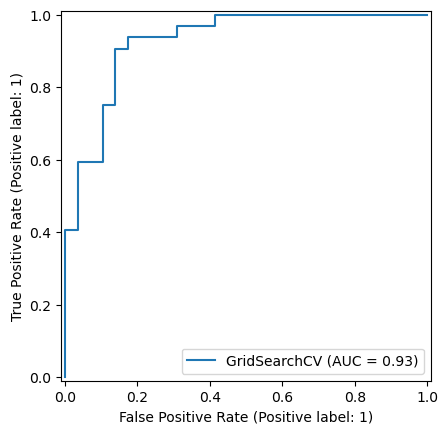

In [50]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log,xtest,ytest)

### Confusion Matirx


In [51]:
confusion_matrix(ytest,ypreds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

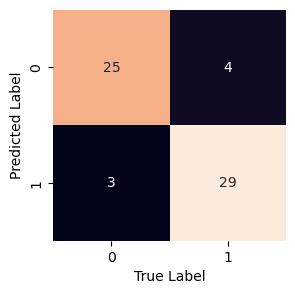

In [52]:
def conf_mat(ytest,ypreds):
    """
    Plots Noice looking Confusion matrix
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(ytest,ypreds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
conf_mat(ytest,ypreds)            
                

### Classification matrix


In [54]:
print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Metrics on cross validation

In [56]:
gs_log.best_params_

{'C': 0.18420699693267145, 'solver': 'liblinear'}

In [58]:
clf = LogisticRegression(C =0.18420699693267145, solver="liblinear")


In [60]:
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [61]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [62]:
cv_pr = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_pr

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [64]:
cv_pr = np.mean(cv_pr)
cv_pr

0.8207936507936507

In [65]:
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [66]:
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

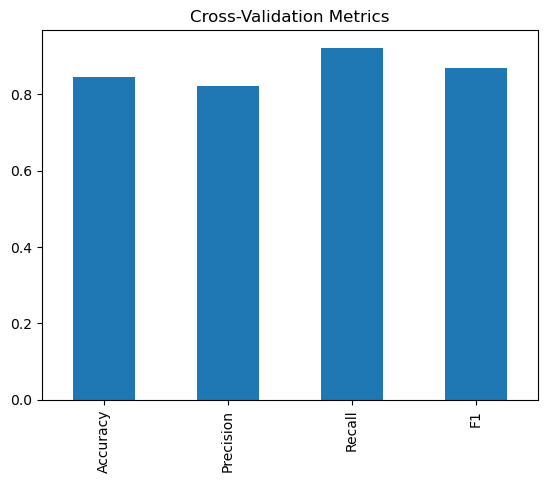

In [70]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_pr,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-Validation Metrics",legend = False);

## Feature Importance

In [72]:
clf.fit(xtrain,ytrain)

LogisticRegression(C=0.18420699693267145, solver='liblinear')

In [73]:
clf.coef_

array([[ 0.00274534, -0.82466189,  0.64946587, -0.01155522, -0.00162953,
         0.04067028,  0.29769479,  0.02448922, -0.58200187, -0.56321728,
         0.43464708, -0.62480489, -0.66201556]])

In [76]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [77]:
feature_dict

{'age': 0.0027453388946929187,
 'sex': -0.824661890588809,
 'cp': 0.6494658744531004,
 'trestbps': -0.011555217578049105,
 'chol': -0.0016295281892291802,
 'fbs': 0.040670283694531004,
 'restecg': 0.29769479242008245,
 'thalach': 0.02448921764656036,
 'exang': -0.5820018686153617,
 'oldpeak': -0.5632172849700932,
 'slope': 0.43464707836362726,
 'ca': -0.6248048892031132,
 'thal': -0.6620155629137882}

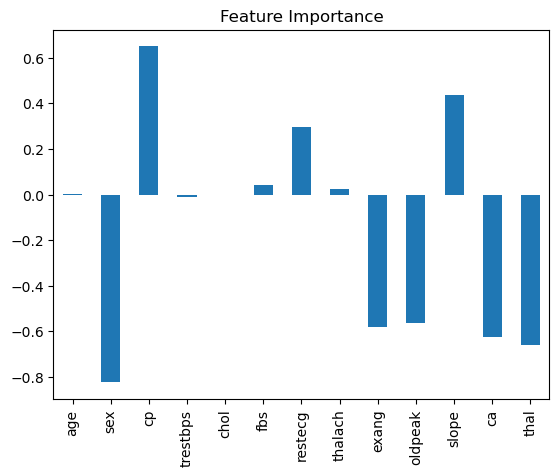

In [79]:
ftdf = pd.DataFrame(feature_dict,index=[0])
ftdf.T.plot.bar(title="Feature Importance",legend=False);
